# Riqueza sin espacio

Calcular la riqueza de especies sin espacio para las comunidades originales y para las matrices modificadas con un mayor efecto de las especies sobre sí mismas.
Primero queremos saber:
1. Tiempo total de simulación. (El original era 1000). R: Con t=500 se alcanza un estado de equilibrio.
2. Parámetros para obtener una riqueza promedio más alta. El promedio de la riqueza sin espacio original es de 4.35 para las comunidades del tipo 1 ("punto fijo") y 5.12 para las del tipo 2 ("oscilatorio"). Observaciones preliminares indican que aumentando el efecto de las especies sobre sí mismas por un factor de 10 aumenta el promedio de la riqueza. ¿Qué más se puede hacer? ¿Aún es posible clasificar las comunidades en esos dos tipos?

    Exp. 2: Aumentando el efecto de las especies en sí mismas por un factor de 10. El promedio de la riqueza de 50 comunidades (muestra) aumentó de 4.92 a 6.09. 
    
    Aumentando por un factor de 20 cambia el promedio a 6.28.
    
    Aumentando por un factor de 25 cambia el promedio a 5.92.
    
    Aumentando por un factor de 15 cambia el promedio a 6.32.
    
    Aumentando por un factor de 18 cambia el promedio a 6.34.

   Prácticamente todas las poblaciones alcanzan un punto fijo de equilibrio así que ya no se distingue entre los dos tipos de comunidades.

3. (Exp. 4) Aumentar las tasas de reproducción de las especies basales por un factor de 10, junto con el aumento en el efecto de las especies sobre sí mismas (por un factor de 15) aumenta el promedio de la riqueza a 7.58.

    Aumentando por un factor de 20 cambia el promedio a 7.66
    
    Aumentando por un factor de 30 cambia el promedio a 7.68
    
    Aumentando por un factor de 25 cambia el promedio a 7.68
    
    Aumentando por un factor de 15 cambia el promedio a 7.62


4. Incluir el efecto del manejo en la dinámica de poblaciones. 

In [1]:
# Módulos necesarios
import numpy as np
import seaborn, os
from scipy.integrate import odeint
from matplotlib import pyplot as plt
from copy import deepcopy

C:\Anaconda\envs\py34\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
np.set_printoptions(precision=3)

In [3]:
%matplotlib nbagg

### Funciones

In [13]:
def lotka(x, t, r_alea, a_alea, manejo): 
    """
    Ecuacion de lotka volterra generalizada que incorpora la intensidad de manejo.
    **De esta forma, la población crece en forma proporcional al manejo.
    """
    dx = x * (r_alea + np.dot(a_alea, x))
    return dx

In [35]:
def riqueza_sin_espacio(poblacion, t=-1):
    return (sum([i>5 for i in poblacion[t]]))

### Comunidades

In [5]:
files = os.listdir("./comunidades")
files.sort()
#print(files)
files = list(filter(lambda x: x[-5] == "m", files))
#print(files)

condiciones_iniciales = [np.loadtxt("./comunidades/" + file[:21] + "c.txt") for file in files]
tasas_reproduccion = [np.loadtxt("./comunidades/" + file[:21] + "v.txt") for file in files]
matriz_interacciones = [np.loadtxt("./comunidades/" + file) for file in files]

In [7]:
matriz_interacciones[5].shape

(10, 10)

Matrices de interacciones modificadas con un mayor efecto de las especies sobre sí mismas:

In [6]:
def modificar_matriz(m):
    for i in range(10):
        m[i][i] *= 15
    return m

In [7]:
def modificar_tasas(tasa):
    tasa[tasa > 0] = tasa[tasa > 0] * 20
    return tasa

In [8]:
matriz2 = deepcopy(matriz_interacciones)
matriz2 = [modificar_matriz(m) for m in matriz2]

In [9]:
tasas2 = deepcopy(tasas_reproduccion)
tasas2 = [modificar_tasas(tasa) for tasa in tasas2]

## Dinámica de poblaciones sin espacio

In [10]:
np.random.seed(4)
muestra = np.random.random_integers(0, 200, (60))
muestra = np.unique(muestra)
muestra = muestra[:50]
print(muestra, len(muestra))

[  0   3  21  30  32  38  44  49  50  52  55  56  57  58  66  73  87  94
  95  98 103 104 109 114 115 117 122 126 129 131 136 137 145 149 151 156
 160 161 164 166 168 170 173 174 176 178 183 185 186 187] 50


In [11]:
t_total = 500
tiempo = np.linspace(0, t_total, t_total+1)
manejo = 1.0 # bosque - como en modelo original

### Experimento 1: matrices de interacción originales

In [17]:
poblacion1 = np.zeros((len(muestra), t_total+1, 10))
infodict1 = [None] * len(muestra)

for i, m in enumerate(muestra):
    poblacion1[i], infodict1[i] = odeint(lotka, condiciones_iniciales[m], tiempo, 
           args=(tasas_reproduccion[m],matriz_interacciones[m], manejo), full_output=True)

In [18]:
[infodict1[i]["message"] for item in infodict1]

['Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration succes

In [19]:
riqueza1 = np.zeros((len(muestra), t_total+1))
for i in range(len(muestra)):  
    for t in range(t_total+1):
        riqueza1[i][t] = riqueza_sin_espacio(poblacion1[i], t)    

In [20]:
riqueza_promedio1 = np.mean([np.mean(x[-10:]) for x in riqueza1])
riqueza_promedio1

4.9219999999999997

In [21]:
for x in riqueza1:
    print(x[-10:])
    print(np.mean(x[-10:]))

[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
4.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
4.0
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
5.0
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
3.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
5.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
3.0
[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
4.0
[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
4.0
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
5.0
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
5.0
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
3.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
4.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
4.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 5.  5.  5.  5.  5.  5.  5.  5.  

<IPython.core.display.Javascript object>


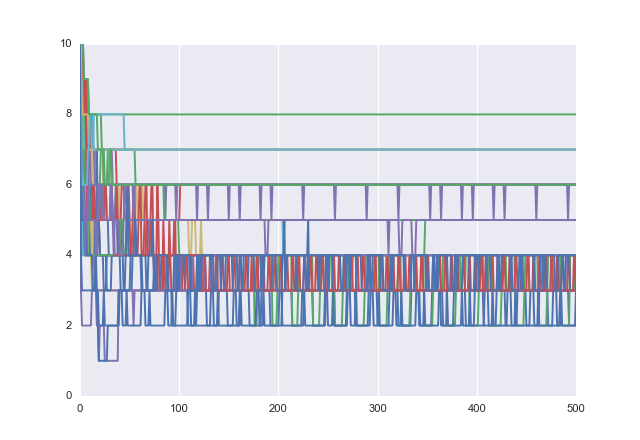

In [22]:
# Graficar riqueza vs tiempo
fig = plt.figure()
#plt.plot(tiempo, riqueza_x, color="green")
for i in range(len(muestra)):
    plt.plot(tiempo, riqueza1[i])
#plt.plot(tiempo, riqueza_z, color="red")
plt.ylim(ymax = 10, ymin = 0)
plt.xlim(xmax = t_total)
plt.show() 

### Experimento 2: matrices de interacción modificadas

In [47]:
poblacion2 = np.zeros((len(muestra), t_total+1, 10))
infodict2 = [None] * len(muestra)

for i, m in enumerate(muestra):
    poblacion2[i], infodict2[i] = odeint(lotka, condiciones_iniciales[m], tiempo, 
           args=(tasas_reproduccion[m],matriz2[m], manejo), full_output=True)

In [48]:
#[infodict2[i]["message"] for item in infodict2]

In [49]:
riqueza2 = np.zeros((len(muestra), t_total+1))
for i in range(len(muestra)):  
    for t in range(t_total+1):
        riqueza2[i][t] = riqueza_sin_espacio(poblacion2[i], t)    

In [50]:
riqueza_promedio2 = np.mean([np.mean(x[-10:]) for x in riqueza2])
riqueza_promedio2

6.3399999999999999

In [ ]:
for x in riqueza2:
    print(x[-10:])
    print(np.mean(x[-10:]))

In [ ]:
# Graficar riqueza vs tiempo
fig = plt.figure()
#plt.plot(tiempo, riqueza_x, color="green")
for i in range(len(muestra)):
    plt.plot(tiempo, riqueza2[i])
#plt.plot(tiempo, riqueza_z, color="red")
plt.ylim(ymax = 10, ymin = 0)
plt.xlim(xmax = t_total)
plt.show() 

### Experimento 4: tasas de reproducción de especies basales modificadas

In [29]:
poblacion4 = np.zeros((len(muestra), t_total+1, 10))
infodict4 = [None] * len(muestra)

for i, m in enumerate(muestra):
    poblacion4[i], infodict4[i] = odeint(lotka, condiciones_iniciales[m]*10, tiempo, 
           args=(tasas2[m],matriz2[m], manejo), full_output=True, printmessg=True)

C:\Anaconda\envs\py34\lib\site-packages\scipy\integrate\odepack.py:159: ODEintWarning: Integration successful.
  warnings.warn(warning_msg, ODEintWarning)
C:\Anaconda\envs\py34\lib\site-packages\scipy\integrate\odepack.py:156: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [30]:
[infodict4[i]["message"] for item in infodict4]

['Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration succes

In [36]:
riqueza4 = np.zeros((len(muestra), t_total+1))
for i in range(len(muestra)):  
    for t in range(t_total+1):
        riqueza4[i][t] = riqueza_sin_espacio(poblacion4[i], t)    

In [37]:
riqueza_promedio4 = np.mean([np.mean(x[-10:]) for x in riqueza4])
riqueza_promedio4

5.5999999999999996

<IPython.core.display.Javascript object>


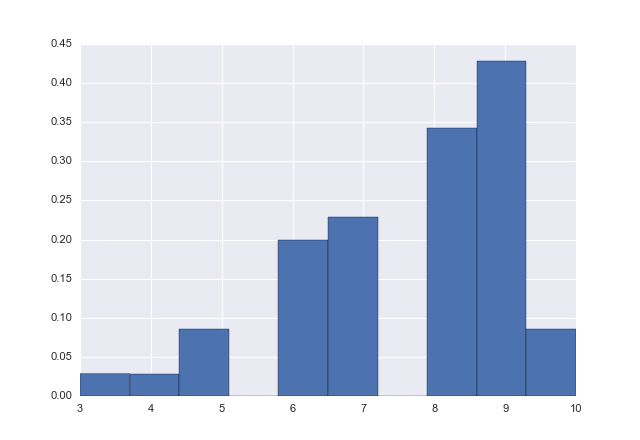

(array([ 0.029,  0.029,  0.086,  0.   ,  0.2  ,  0.229,  0.   ,  0.343,
         0.429,  0.086]),
 array([  3. ,   3.7,   4.4,   5.1,   5.8,   6.5,   7.2,   7.9,   8.6,
          9.3,  10. ]),
 <a list of 10 Patch objects>)

In [27]:
%matplotlib nbagg
plt.hist([np.mean(x[-10:]) for x in riqueza4], normed = 1)

In [ ]:
from scipy.stats.mstats import normaltest
normaltest([np.mean(x[-10:]) for x in riqueza4])

In [38]:
for x in riqueza4:
    print(x[-10:])
    print(np.mean(x[-10:]))

[ 7.  7.  7.  7.  7.  7.  7.  7.  7.  7.]
7.0
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
5.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
4.0
[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
4.0
[ 8.  8.  8.  8.  8.  8.  8.  8.  8.  8.]
8.0
[ 8.  8.  8.  8.  8.  8.  8.  8.  8.  8.]
8.0
[ 5.  5.  5.  5.  5.  5.  5.  5.  5.  5.]
5.0
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
3.0
[ 8.  8.  8.  8.  8.  8.  8.  8.  8.  8.]
8.0
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
3.0
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
1.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 3.  3.  3.  3.  3.  3.  3.  3.  3.  3.]
3.0
[ 4.  4.  4.  4.  4.  4.  4.  4.  4.  4.]
4.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 6.  6.  6.  6.  6.  6.  6.  6.  6.  6.]
6.0
[ 8.  8.  8.  8.  8.  8.  8.  8.  8.  8.]
8.0
[ 8.  8.  8.  8.  8.  8.  8.  8.  

<IPython.core.display.Javascript object>


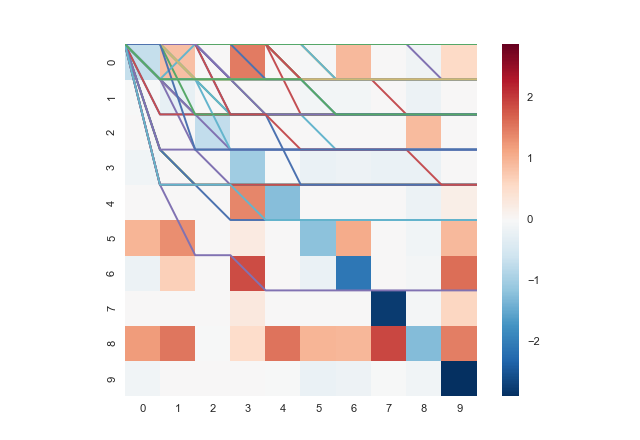

In [20]:
# Graficar riqueza vs tiempo
fig = plt.figure()
#plt.plot(tiempo, riqueza_x, color="green")
for i in range(len(muestra)):
    plt.plot(tiempo, riqueza4[i])
#plt.plot(tiempo, riqueza_z, color="red")
plt.ylim(ymax = 10, ymin = 0)
plt.xlim(xmax = t_total)
plt.show() 

## Dinámica de poblaciones + manejo

Usaré las matrices de interacción modificadas por un factor de 15 (`matriz2`), las tasas de reproducción modificadas por un factor de 20 (`tasas2`) y una sola comunidad.

In [18]:
comunidad = muestra[-1]
print(comunidad)

187


In [19]:
t_total = 500
tiempo = np.linspace(0, t_total, t_total+1)

In [20]:
%run vector_identidades_2.py

In [21]:
identidades = vector_identidades_2(matriz_interacciones[comunidad])
list(zip(identidades, tasas2[comunidad]))

[(0.0, -0.47228621747125588),
 (1.0, 17.883699743193848),
 (2.0, -0.12018743131448284),
 (1.0, 34.61254688685937),
 (0.0, -0.82042591171049284),
 (0.0, -0.20213331826215131),
 (0.0, -0.29534445360038464),
 (0.0, -0.29240061541913853),
 (0.0, -0.64285083905696949),
 (1.0, 1.1684540809066335)]

In [26]:
seaborn.heatmap(matriz2[comunidad], square=True)

In [68]:
#manejos = np.array([1.0, 0.7, 0.4, 0.0])
manejos = np.array([1/1.0, 1/3.0, 1/7.0, 1/10.0])  # 1 = bosque, 0.1 = intensivo
print(manejos)
manejos2 = np.array([1, 4, 7, 10]) # 1 = bosque, 10 = intensivo
print(manejos2)
manejos2 = -0.1 * manejos2 + 1.1
print(manejos2)
manejos = manejos2
print(manejos)



[ 1.     0.333  0.143  0.1  ]
[ 1  4  7 10]
[ 1.   0.7  0.4  0.1]
[ 1.   0.7  0.4  0.1]


In [63]:
1/7

0.14285714285714285

In [23]:
def lotka1(x, t, r, a, manejo): 
    """
    Ecuacion de lotka volterra generalizada que incorpora la intensidad de manejo.
    **De esta forma, la población crece en forma proporcional al manejo.
    """
    r = r / manejo
    r[r > 0] = r[r > 0] * (manejo) ** 2
    #dx = x * (r + np.dot(a, x))
    return (x * (r + np.dot(a, x)))

In [24]:
def lotka0(x, t, r, a, manejo): 
    """
    Ecuacion de lotka volterra generalizada que incorpora la intensidad de manejo.
    **De esta forma, la población crece en forma proporcional al manejo.
    """
    #dx = x * (r + np.dot(a, x))
    return x * (manejo * r + np.dot(a, x))

In [25]:
def lotka2(x, t, r, a, manejo): 
    """
    Ecuacion de lotka volterra generalizada que incorpora la intensidad de manejo.
    **De esta forma, la población crece en forma proporcional al manejo.
    """
    r = r / manejo
    r[r > 0] = r[r > 0] * (manejo) ** 2
    #dx = x * (r + np.dot(a, x))
    return (x * (r + np.dot(a, x)))

### Experimento 3: dinámica de poblaciones + manejo con función `lotka1`

In [48]:
poblacion3 = np.zeros((len(manejos), t_total+1, 10))
infodict3 = [None] * len(manejos)

for i, m in enumerate(manejos):
    poblacion3[i], infodict3[i] = odeint(lotka1, condiciones_iniciales[comunidad], tiempo, 
           args=(tasas2[comunidad],matriz2[comunidad], m), full_output=True)

In [49]:
[infodict3[i]["message"] for item in infodict3]

['Integration successful.',
 'Integration successful.',
 'Integration successful.',
 'Integration successful.']

In [50]:
riqueza3 = np.zeros((len(manejos), t_total+1))
for i in range(len(manejos)):  
    for t in range(t_total+1):
        riqueza3[i][t] = riqueza_sin_espacio(poblacion3[i], t)    

In [51]:
#La riqueza al final de t=500
riqueza_promedio3 = [np.mean(x[-10:]) for x in riqueza3]
print(riqueza_promedio3)
print(riqueza4[-1][-10:])

[8.0, 8.0, 7.0, 7.0]
[ 8.  8.  8.  8.  8.  8.  8.  8.  8.  8.]


### Experimento 5: dinámica de poblaciones + manejo con función `lotka0`

Esta había sido la primera propuesta, pero no parece funcionar.

In [53]:
poblacion5 = np.zeros((len(manejos), t_total+1, 10))
infodict5 = [None] * len(manejos)

for i, m in enumerate(manejos):
    poblacion5[i], infodict5[i] = odeint(lotka0, condiciones_iniciales[comunidad], tiempo, 
           args=(tasas2[comunidad],matriz2[comunidad], m), full_output=True)

In [54]:
riqueza5 = np.zeros((len(manejos), t_total+1))
for i in range(len(manejos)):  
    for t in range(t_total+1):
        riqueza5[i][t] = riqueza_sin_espacio(poblacion5[i], t)    

In [55]:
#La riqueza al final de t=500
riqueza_promedio5 = [np.mean(x[-10:]) for x in riqueza5]
print(riqueza_promedio5)
print(riqueza4[-1][-10:])

[8.0, 8.0, 8.0, 8.0]
[ 8.  8.  8.  8.  8.  8.  8.  8.  8.  8.]


<IPython.core.display.Javascript object>


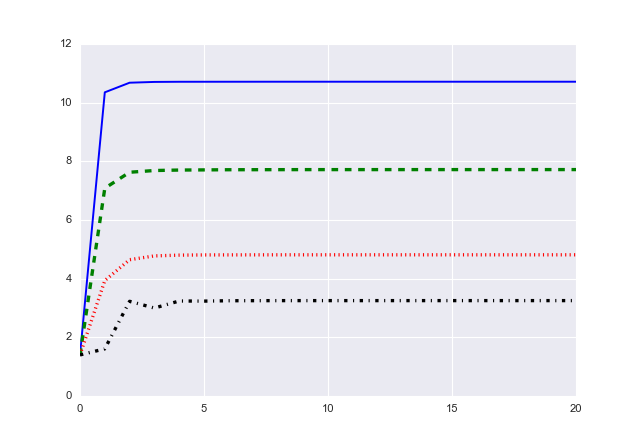

In [56]:
#Graficar la población de una especie
fig = plt.figure()
fig.add_subplot(111)
plt.plot(tiempo, poblacion3[0][:, [1]], ls = "-", c="blue")
plt.plot(tiempo, poblacion3[1][:, [1]], ls = "--", lw = "3", c="green")
plt.plot(tiempo, poblacion3[2][:, [1]], ls = ":", lw = "3", c="red" )
plt.plot(tiempo, poblacion3[3][:, [1]], ls = "-.", lw = "3", c="black")

#plt.plot(tiempo, z[:, [3]], color = "red")
plt.xlim(xmax = 20)
plt.show()

<IPython.core.display.Javascript object>


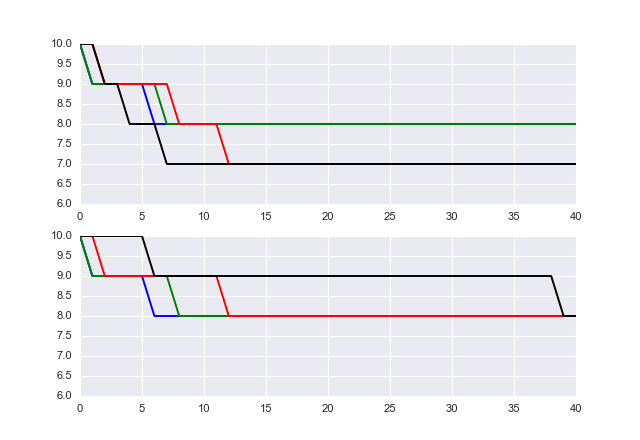

In [61]:
#Gráficas de riqueza
fig = plt.figure()
fig.add_subplot(2, 1, 1)
plt.plot(tiempo, riqueza3[0], color="blue")
plt.plot(tiempo, riqueza3[1], color="green")
plt.plot(tiempo, riqueza3[2], color="red")
plt.plot(tiempo, riqueza3[3], color="black")
plt.ylim(ymax = 10, ymin = 6)
plt.xlim(xmax = 40)

fig.add_subplot(2, 1, 2)
plt.plot(tiempo, riqueza5[0], color="blue")
plt.plot(tiempo, riqueza5[1], color="green")
plt.plot(tiempo, riqueza5[2], color="red")
plt.plot(tiempo, riqueza5[3], color="black")

plt.ylim(ymax = 10, ymin = 6)
plt.xlim(xmax = 40)
plt.show() 

### Otros

<IPython.core.display.Javascript object>


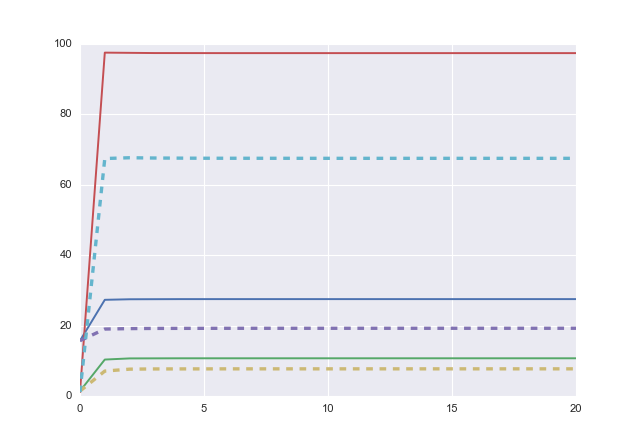

In [62]:
#Graficar la población de una especie
fig = plt.figure()
fig.add_subplot(111)
plt.plot(tiempo, poblacion3[0][:, [0, 1, 2]], ls = "-")
plt.plot(tiempo, poblacion3[1][:, [0, 1, 2]], ls = "--", lw = "3")

#plt.plot(tiempo, z[:, [3]], color = "red")
plt.xlim(xmax = 20)
plt.show()

<IPython.core.display.Javascript object>


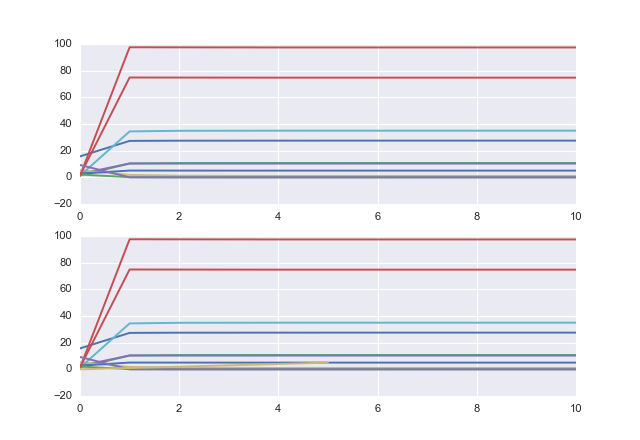

In [64]:
#Graficar sistema
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(tiempo, poblacion3[0])
plt.xlim(xmax = 10)

plt.subplot(212)
plt.plot(tiempo, poblacion4[-1])

plt.xlim(xmax = 10)
#plt.ylim(ymin = -1, ymax = 400)
plt.show()

### ¿Cómo cambia r con el manejo?

[ -5.000e+02  -4.500e+02  -4.000e+02  -3.500e+02  -3.000e+02  -2.500e+02
  -2.000e+02  -1.500e+02  -1.000e+02  -5.000e+01   0.000e+00   5.000e-03
   1.000e-02   1.500e-02   2.000e-02   2.500e-02   3.000e-02   3.500e-02
   4.000e-02   4.500e-02   5.000e-02]


<IPython.core.display.Javascript object>


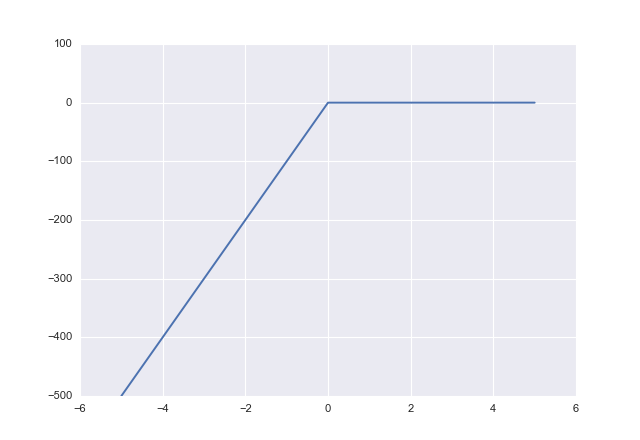

In [71]:

r = np.linspace(-5, 5, 21)
manejo2 = 0.01
r = r / manejo2
r[r > 0] = r[r > 0] * (manejo2) ** 2
print(r)
plt.plot(np.linspace(-5, 5, 21), r)

In [72]:
len(matriz_interacciones[0])

10

In [74]:
poblacion3[1][-1].shape

(10,)

In [1]:
# Execute this cell to load the notebook's style sheet, then ignore it
# Original de numericalmooc, por Lorena Barba
from IPython.core.display import HTML
css_file = "C:/Users/hp\Desktop/proyectof/style2.css"
HTML(open(css_file, "r").read())